## NAME: JUDE TOCHUKWU OGBOZOR

## TITLE: G2M insight for Cab Investment firm 

## DATE: 13TH MAY, 2022

In [1]:
import pandas as pd
import datasist as ds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [3]:
#change date of travel to datetime type
cab_data['Date of Travel']=pd.to_datetime(cab_data['Date of Travel'],unit='D',origin='1899-12-30')

In [4]:
ds.structdata.describe(cab_data)

First five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776




Random five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
74735,10092879,2016-10-16,Yellow Cab,CHICAGO IL,26.73,385.98,356.0436
15124,10019236,2016-03-23,Yellow Cab,LOS ANGELES CA,12.21,211.29,155.3112
317022,10389195,2018-10-12,Pink Cab,SILICON VALLEY,37.29,636.19,391.5450
259316,10317943,2018-04-14,Pink Cab,DENVER CO,8.40,112.18,96.6000
165243,10203828,2017-08-07,Yellow Cab,LOS ANGELES CA,14.56,278.57,202.6752




Last five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192




Shape of  data set: (359392, 7)


Size of  data set: 2515744


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Date of Travel,datetime64[ns]
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip']


Categorical Features in Data set


['Company', 'City']



Statistical Description of Columns


,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000




Description of Categorical Features


,count,unique,top,freq
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885




Unique class Count of Categorical features


,Feature,Unique Count
0,Company,2
1,City,19




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Date of Travel,0,0.0
2,Company,0,0.0
3,City,0,0.0
4,KM Travelled,0,0.0
5,Price Charged,0,0.0
6,Cost of Trip,0,0.0


In [5]:
Corre_cab_data= cab_data.corr()
Corre_cab_data

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462
KM Travelled,-0.001429,1.000000,0.835753,0.981848
Price Charged,-0.052902,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,0.981848,0.859812,1.000000


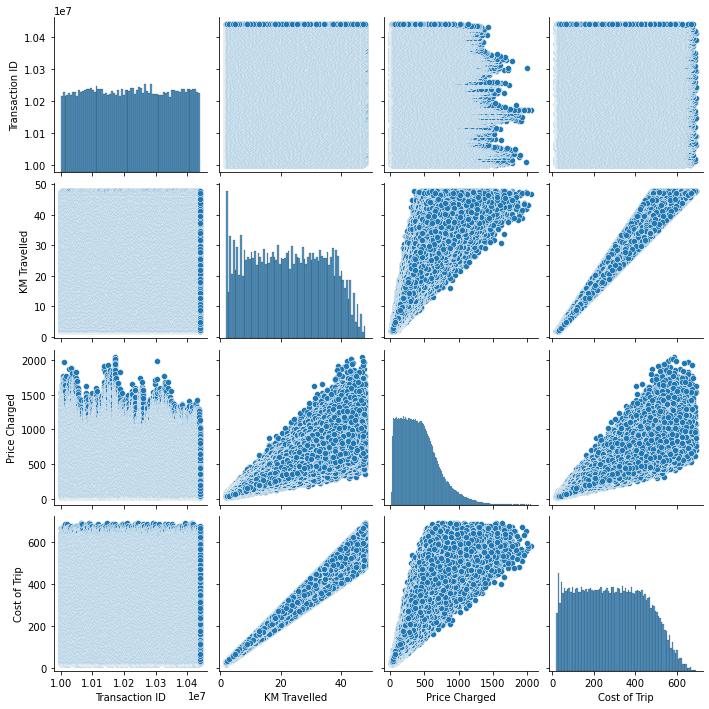

In [6]:
sns.pairplot(cab_data)

In [7]:
city=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city.dtypes

City          object
Population    object
Users         object
dtype: object

Change the population and user type to integer

In [8]:
city.sample(5)

,City,Population,Users
4,SILICON VALLEY,"1,177,609","27,247"
2,LOS ANGELES CA,"1,595,037","144,132"
18,NASHVILLE TN,"327,225","9,270"
13,TUCSON AZ,"631,442","5,712"
17,WASHINGTON DC,"418,859","127,001"


Remove the comma which will prevent the dtype change to integer

In [9]:
city["Population"]=city.Population.str.replace("[,]", "", regex=True)
city["Users"]=city.Users.str.replace("[,]", "", regex=True)

In [10]:

city.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [11]:
city[["Users","Population"]]=city[["Users","Population"]].astype(int)

In [12]:
ds.structdata.describe(city)

First five data points


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247




Random five data points


,City,Population,Users
4,SILICON VALLEY,1177609,27247
2,LOS ANGELES CA,1595037,144132
15,SACRAMENTO CA,545776,7044
14,SAN FRANCISCO CA,629591,213609
9,ATLANTA GA,814885,24701




Last five data points


,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021




Shape of  data set: (20, 3)


Size of  data set: 60


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
City,object
Population,int32
Users,int32




Numerical Features in Data set
['Population', 'Users']


Categorical Features in Data set


['City']



Statistical Description of Columns


,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000




Description of Categorical Features


,count,unique,top,freq
City,20,20,NEW YORK NY,1




Unique class Count of Categorical features


,Feature,Unique Count
0,City,20




Missing Values in Data


,features,missing_counts,missing_percent
0,City,0,0.0
1,Population,0,0.0
2,Users,0,0.0


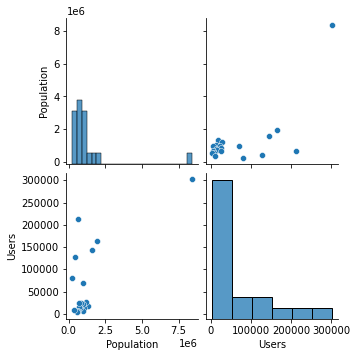

In [13]:
sns.pairplot(city)

In [14]:
corre_city=city.corr()
corre_city

,Population,Users
Population,1.000000,0.703382
Users,0.703382,1.000000


In [15]:
customer_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
ds.structdata.describe(customer_ID)

First five data points


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536




Random five data points


,Customer ID,Gender,Age,Income (USD/Month)
37621,54829,Male,39,5986
40933,12781,Male,32,24432
31563,34233,Male,39,10565
32885,15296,Male,40,6413
14466,5538,Male,34,28969




Last five data points


,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128




Shape of  data set: (49171, 4)


Size of  data set: 196684


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Customer ID,int64
Gender,object
Age,int64
Income (USD/Month),int64




Numerical Features in Data set
['Customer ID', 'Age', 'Income (USD/Month)']


Categorical Features in Data set


['Gender']



Statistical Description of Columns


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000




Description of Categorical Features


,count,unique,top,freq
Gender,49171,2,Male,26562




Unique class Count of Categorical features


,Feature,Unique Count
0,Gender,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Customer ID,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Income (USD/Month),0,0.0


In [16]:
transaction_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
ds.structdata.describe(transaction_ID)

First five data points


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card




Random five data points


,Transaction ID,Customer ID,Payment_Mode
252131,10252142,15770,Cash
159966,10159977,43593,Card
382625,10382636,4601,Card
118577,10118588,1967,Cash
242266,10242277,57121,Card




Last five data points


,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card




Shape of  data set: (440098, 3)


Size of  data set: 1320294


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Customer ID,int64
Payment_Mode,object




Numerical Features in Data set
['Transaction ID', 'Customer ID']


Categorical Features in Data set


['Payment_Mode']



Statistical Description of Columns


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000




Description of Categorical Features


,count,unique,top,freq
Payment_Mode,440098,2,Card,263991




Unique class Count of Categorical features


,Feature,Unique Count
0,Payment_Mode,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Customer ID,0,0.0
2,Payment_Mode,0,0.0


In [17]:
#merge some table with common reference
merge1 =pd.merge(city,cab_data,on='City',how='outer')
merge2 =pd.merge(customer_ID,transaction_ID,on='Customer ID',how='outer')


In [21]:
#Create a master dataframe
Master_df=pd.merge(merge1,merge2,on='Transaction ID',how='outer')
data=Master_df.dropna()
ds.structdata.describe(data)

First five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2416.0,Male,28.0,21399.0,Cash
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,2060.0,Male,18.0,8149.0,Card
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,1451.0,Male,35.0,23989.0,Card
3,NEW YORK NY,8405837.0,302149.0,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,1609.0,Male,30.0,23036.0,Card
4,NEW YORK NY,8405837.0,302149.0,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2927.0,Male,33.0,14520.0,Cash




Random five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
251172,DALLAS TX,942908.0,22157.0,10318808.0,2018-04-13,Yellow Cab,38.15,807.04,457.8000,25683.0,Female,32.0,9674.0,Card
122484,CHICAGO IL,1955130.0,164468.0,10170236.0,2017-05-03,Yellow Cab,6.12,85.28,74.1744,3761.0,Male,23.0,10301.0,Cash
321941,WASHINGTON DC,418859.0,127001.0,10388069.0,2018-10-06,Yellow Cab,9.36,166.19,124.6752,53600.0,Male,57.0,15553.0,Card
5066,NEW YORK NY,8405837.0,302149.0,10026998.0,2016-04-21,Yellow Cab,14.85,399.50,203.1480,2967.0,Female,52.0,22120.0,Card
217955,SILICON VALLEY,1177609.0,27247.0,10365385.0,2018-08-25,Pink Cab,3.12,50.57,36.8160,12230.0,Male,36.0,11217.0,Card




Last five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
359388,BOSTON MA,248968.0,80021.0,10437872.0,2018-01-04,Yellow Cab,1.96,26.23,25.1664,59926.0,Female,59.0,4172.0,Card
359389,BOSTON MA,248968.0,80021.0,10437873.0,2018-01-05,Yellow Cab,23.52,380.22,338.6880,57905.0,Male,60.0,31941.0,Card
359390,BOSTON MA,248968.0,80021.0,10437874.0,2018-01-06,Yellow Cab,29.10,393.33,391.1040,57906.0,Male,37.0,26410.0,Cash
359391,BOSTON MA,248968.0,80021.0,10437875.0,2018-01-08,Yellow Cab,3.33,42.31,46.7532,59259.0,Male,51.0,15360.0,Cash
359392,BOSTON MA,248968.0,80021.0,10437876.0,2018-01-03,Yellow Cab,23.75,349.91,290.7000,59908.0,Male,30.0,8909.0,Card




Shape of  data set: (359392, 14)


Size of  data set: 5031488


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
City,object
Population,float64
Users,float64
Transaction ID,float64
Date of Travel,datetime64[ns]
Company,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Customer ID,float64




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Population', 'Users', 'Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Age', 'Income (USD/Month)']


Categorical Features in Data set


['City', 'Company', 'Gender', 'Payment_Mode']



Statistical Description of Columns


,Population,Users,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,3.132198e+06,158365.582267,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,3.315194e+06,100850.051020,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,2.489680e+05,3643.000000,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,6.712380e+05,80021.000000,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.595037e+06,144132.000000,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,8.405837e+06,302149.000000,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,8.405837e+06,302149.000000,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000




Description of Categorical Features


,count,unique,top,freq
City,359392,19,NEW YORK NY,99885
Company,359392,2,Yellow Cab,274681
Gender,359392,2,Male,205912
Payment_Mode,359392,2,Card,215504




Unique class Count of Categorical features


,Feature,Unique Count
0,City,19
1,Company,2
2,Gender,2
3,Payment_Mode,2




Missing Values in Data


,features,missing_counts,missing_percent
0,City,0,0.0
1,Population,0,0.0
2,Users,0,0.0
3,Transaction ID,0,0.0
4,Date of Travel,0,0.0
5,Company,0,0.0
6,KM Travelled,0,0.0
7,Price Charged,0,0.0
8,Cost of Trip,0,0.0
9,Customer ID,0,0.0


<AxesSubplot:xlabel='City', ylabel='count'>

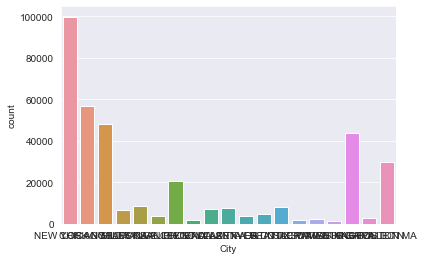

In [26]:
#countplot of some categorical data

sns.set_style('darkgrid')
sns.countplot(x='City', data=data)


<AxesSubplot:xlabel='Company', ylabel='count'>

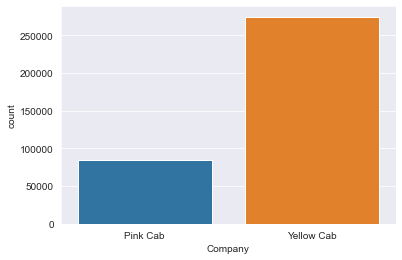

In [30]:
sns.countplot(x='Company',data=data, hue_order=['Gender','Payment_Mode'])

<AxesSubplot:xlabel='Company', ylabel='Cost of Trip'>

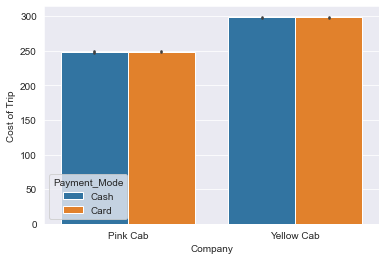

In [31]:
sns.barplot(x='Company',y='Cost of Trip',data=data, hue='Payment_Mode')